In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
img_path = "./output/cropped_frame.jpg"
img = cv2.imread(img_path)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Otsu's method for thresholding
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [4]:
kernel = np.ones((5,5), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Find contours
# contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define color range for segmentation (adjust these values as needed)
lower_color = np.array([30, 40, 40])
upper_color = np.array([90, 255, 255])
mask = cv2.inRange(hsv, lower_color, upper_color)


mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [6]:
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank mask to draw the desired contours


inner_region_mask = np.zeros_like(mask)

# Draw the contours onto the blank mask
cv2.drawContours(inner_region_mask, contours, -1, (255), thickness=cv2.FILLED)

# Subtract the inner region mask from the original mask to get the desired region
desired_region_mask = cv2.bitwise_and(mask, cv2.bitwise_not(inner_region_mask))

# Find contours in the desired region mask
desired_contours, _ = cv2.findContours(desired_region_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours of the desired region on the original image for visualization
outlined_image = img.copy()
cv2.drawContours(outlined_image, desired_contours, -1, (0, 255, 0), cv2.FILLED)

array([[[ 88, 142, 105],
        [ 88, 142, 105],
        [ 85, 142, 103],
        ...,
        [ 82, 138, 103],
        [ 84, 141, 103],
        [ 85, 142, 104]],

       [[ 88, 142, 105],
        [ 88, 142, 105],
        [ 86, 143, 104],
        ...,
        [ 82, 138, 103],
        [ 83, 140, 102],
        [ 84, 141, 103]],

       [[ 87, 141, 104],
        [ 87, 141, 104],
        [ 87, 142, 103],
        ...,
        [ 82, 138, 103],
        [ 83, 140, 102],
        [ 84, 141, 103]],

       ...,

       [[ 76, 127,  93],
        [ 75, 126,  92],
        [ 75, 125,  91],
        ...,
        [ 80, 132,  95],
        [ 78, 132,  95],
        [ 77, 131,  94]],

       [[ 79, 130,  96],
        [ 76, 127,  93],
        [ 76, 126,  92],
        ...,
        [ 78, 130,  93],
        [ 75, 129,  92],
        [ 74, 128,  91]],

       [[ 80, 132,  95],
        [ 77, 129,  92],
        [ 77, 127,  93],
        ...,
        [ 76, 128,  91],
        [ 73, 127,  90],
        [ 72, 126,  89]]

In [7]:
coordinates = []
for contour in desired_contours:
    for point in contour:
        coordinates.append(tuple(point[0]))


In [10]:
coordinates

[(0, 0), (0, 100), (45, 100), (45, 0)]

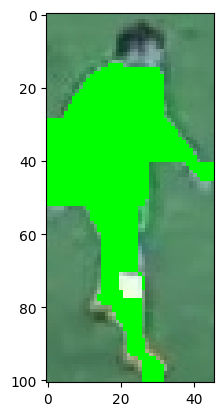

In [8]:
plt.imshow(outlined_image)

In [20]:
desired_contours

(array([[[ 17,  14]],
 
        [[ 16,  15]],
 
        [[ 15,  15]],
 
        [[ 14,  16]],
 
        [[ 13,  16]],
 
        [[ 10,  19]],
 
        [[ 10,  20]],
 
        [[  7,  23]],
 
        [[  7,  24]],
 
        [[  6,  25]],
 
        [[  6,  26]],
 
        [[  5,  27]],
 
        [[  5,  28]],
 
        [[  4,  29]],
 
        [[  0,  29]],
 
        [[  0,  52]],
 
        [[ 10,  52]],
 
        [[ 12,  54]],
 
        [[ 12,  56]],
 
        [[ 14,  58]],
 
        [[ 14,  59]],
 
        [[ 15,  60]],
 
        [[ 15,  76]],
 
        [[ 14,  77]],
 
        [[ 14,  78]],
 
        [[ 15,  79]],
 
        [[ 17,  79]],
 
        [[ 18,  80]],
 
        [[ 18,  81]],
 
        [[ 19,  82]],
 
        [[ 19,  83]],
 
        [[ 21,  85]],
 
        [[ 21,  86]],
 
        [[ 22,  87]],
 
        [[ 22,  92]],
 
        [[ 23,  93]],
 
        [[ 24,  93]],
 
        [[ 26,  95]],
 
        [[ 26, 100]],
 
        [[ 31, 100]],
 
        [[ 31,  96]],
 
        [[ 29,  

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "output/cropped_frame.jpg"
image = cv2.imread(image_path)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define color range for grass (you may need to adjust these values)
lower_grass = np.array([35, 40, 40])
upper_grass = np.array([85, 255, 255])

# Create a binary mask where the grass color range is met
grass_mask = cv2.inRange(hsv, lower_grass, upper_grass)

# Invert the grass mask to get the mask of the player
player_mask = cv2.bitwise_not(grass_mask)

# Perform morphological operations to remove small noise and fill gaps
kernel = np.ones((5, 5), np.uint8)
player_mask = cv2.morphologyEx(player_mask, cv2.MORPH_CLOSE, kernel)
player_mask = cv2.morphologyEx(player_mask, cv2.MORPH_OPEN, kernel)

# Extract the player region
player_region = cv2.bitwise_and(image, image, mask=player_mask)

# Find contours in the player mask for visualization
contours, _ = cv2.findContours(player_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image for visualization
outlined_image = image.copy()
cv2.drawContours(outlined_image, contours, -1, (0, 255, 0), 2)

# Calculate the average color of the player region
mean_color = cv2.mean(player_region, mask=player_mask)[:3]  # Exclude the alpha channel if present


# cv2.imwrite(output_path, outlined_image)
plt.imshow(outlined_image)

# Display the result
# cv2.imshow("Outlined Player", outlined_image)
# cv2.imshow("Player Region", player_region)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# print(f"Outlined image saved at {output_path}")
print(f"Average color of the player region (BGR): {mean_color}")


NameError: name 'plt' is not defined

# TEST

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def segment_image(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Otsu's method for thresholding
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define color range for segmentation (adjust these values as needed)
    lower_color = np.array([30, 40, 40])
    upper_color = np.array([90, 255, 255])
    mask = cv2.inRange(hsv, lower_color, upper_color)


    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask to draw the desired contours
    inner_region_mask = np.zeros_like(mask)

    # Draw the contours onto the blank mask
    cv2.drawContours(inner_region_mask, contours, -1, (255), thickness=cv2.FILLED)

    # Subtract the inner region mask from the original mask to get the desired region
    desired_region_mask = cv2.bitwise_and(mask, cv2.bitwise_not(inner_region_mask))

    # Find contours in the desired region mask
    desired_contours, _ = cv2.findContours(desired_region_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours of the desired region on the original image for visualization
    # outlined_frame = frame.copy()
    # cv2.drawContours(outlined_frame, desired_contours, -1, (0, 255, 0), cv2.FILLED)

    return desired_contours

In [10]:
for i in range(1,9):
    filename = "output/cropped_frame_"+ str(i) + ".jpg"
    if not (os.path.exists(filename)):
        break

    curr_im = cv2.imread(filename)

    contours = segment_image(curr_im)
    cv2.drawContours(curr_im, contours, -1, (0, 255, 0), cv2.FILLED)
    # cv2.resize(curr_im, (0, 0), fx = 5, fy = 5)
    resized = cv2.resize(curr_im, None, fx = 6, fy = 6, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("filename", resized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
# break

KeyboardInterrupt: 

clustering approach

In [1]:
import cv2
from sklearn.cluster import KMeans, MeanShift, SpectralClustering
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def k_cluster_img(image):
    image_2d = image.reshape(-1, 3)
    kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
    labels = kmeans.labels_
    clustered_img = labels.reshape(image.shape[0], image.shape[1])
    return clustered_img
# plt.imshow(clustered_img)

In [3]:
def all_cluster_img(image, n_clusters=2, bandwidth=2):
    image_2d = image.reshape(-1, 3)
    
    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_2d)
    kmeans_labels = kmeans.labels_
    kmeans_clustered_img = kmeans_labels.reshape(image.shape[0], image.shape[1])
    
    # MeanShift clustering
    mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(image_2d)
    mean_shift_labels = mean_shift.labels_
    mean_shift_clustered_img = mean_shift_labels.reshape(image.shape[0], image.shape[1])
    
    # SpectralClustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors').fit(image_2d)
    spectral_labels = spectral.labels_
    spectral_clustered_img = spectral_labels.reshape(image.shape[0], image.shape[1])
    
    return kmeans_clustered_img, mean_shift_clustered_img, spectral_clustered_img

In [20]:
def extract_outside_crop(original_image, crop_rect):
    # Create a mask of the same size as the original image, initialized to all zeros
    mask = np.zeros(original_image.shape[:2], dtype=np.uint8)

    # Extract crop rectangle coordinates
    x, y, w, h = crop_rect

    # Draw a white rectangle on the mask to represent the cropped area
    mask[y:y+h, x:x+w] = 255

    # Invert the mask to get the area outside the crop
    mask_inv = cv2.bitwise_not(mask)

    # Use the inverted mask to extract the desired region from the original image
    outside_crop = cv2.bitwise_and(original_image, original_image, mask=mask_inv)

    return outside_crop

d:\Apps\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


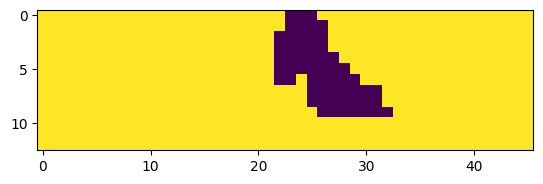

d:\Apps\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


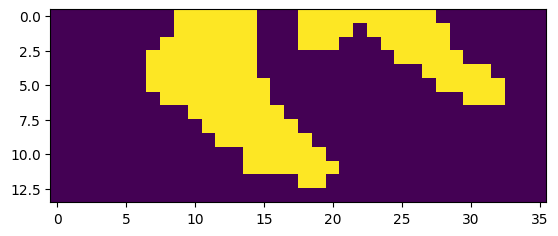

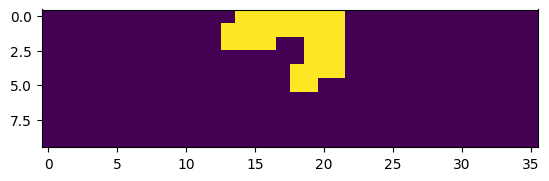

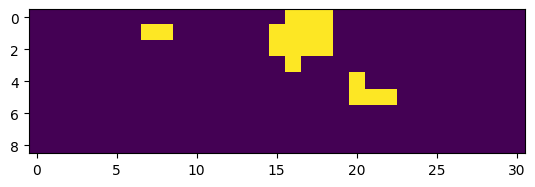

d:\Apps\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


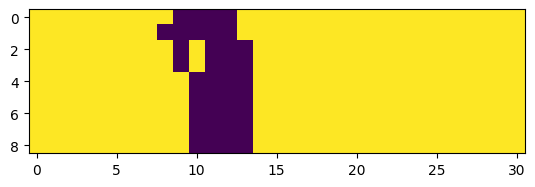

d:\Apps\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


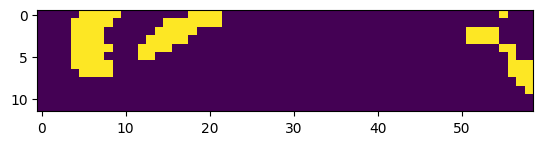

In [35]:
for i in range(1,9):
    filename = "output/cropped_frame_"+ str(i) + ".jpg"
    if not (os.path.exists(filename)):
        break

    curr_im = cv2.imread(filename)

    k, m, s = all_cluster_img(curr_im, bandwidth=0.04)
    # cv2.resize(curr_im, (0, 0), fx = 5, fy = 5)
    # resized = cv2.resize(clustered, None, fx = 6, fy = 6, interpolation = cv2.INTER_CUBIC)
    h,w = k.shape
    # crop = [int(w/3), int(h/8), int(2*w/3), int(h/2)] # for inner
    crop = [int(0), int(7*h/8), int(w), int(h)] # for bottom outer

    cropped_frame = k[int(crop[1]):int(crop[3]), int(crop[0]):int(crop[2])]


    corners = [k[0,0], k[0,-1], k[-1,0], k[-1,-1]]
    non_player = max(set(corners), key=corners.count)
    # print(corners)

    plt.imshow(cropped_frame)
    # plt.imshow(cropped_frame) 
    # plt.imshow(m) 
    # plt.imshow(s) 

    plt.show()
    # break

    # cv2.imshow("filename", clustered)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
# break

In [39]:
height, width = cropped_frame.shape

# Create a weight matrix
weights = np.zeros((height, width))

# Assign higher weights to the sides, excluding the top
for y in range(height):
    for x in range(width):
        if y > 0:  # Exclude the top row
            # Linear weighting: increase weight linearly towards the sides
            weight = max(x / (width / 2), (width - x - 1) / (width / 2))
            weights[y, x] = weight

# Normalize weights to sum to 1
weights = weights / weights.sum()

# Compute the weighted average for the single-channel image
weighted_avg = np.sum(cropped_frame * weights)

print("Weighted Average:", weighted_avg)

Weighted Average: 0.13004121024268256
